In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
from IPython.display import display, HTML

In [2]:
ins = BrainSpan()
# Columns Meta Data
bp_exon_col_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/columns_metadata.csv", delimiter=",")
bp_exon_col_meta.age.unique()
bp_exon_col_meta["Period"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[0], axis=1)
bp_exon_col_meta["Stage"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[1], axis=1)
bp_exon_col_meta["Description"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[2], axis=1)

# Rows Meta Data
bp_exon_row_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/rows_metadata.csv", delimiter=",")
bp_exon_row_meta["exon length"] = bp_exon_row_meta["end"] - bp_exon_row_meta["start"]

# Exon RPKM Matrix
ExonExp = pd.read_csv("../data/expression/brainspan/exons_matrix/expression_matrix.csv", header=None)
# Exon RPKM Norm by Gene RPKM
NormExonExp = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/NormedExonExpMatrix.csv", header = None)

In [3]:
VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014LGD.xlsx"
ins.AssignVar2Exon2(bp_exon_row_meta, VarFile)
bp_exon_row_meta_with_gene = bp_exon_row_meta[bp_exon_row_meta["GeneHited"]=="T"]
bp_exon_row_meta_with_gene.to_excel("GenesExonsTargetedByLGD_wilger2014_predicted.xlsx", index=False)
bp_exon_row_meta_with_var = bp_exon_row_meta_with_gene[bp_exon_row_meta_with_gene["Vars"]!=""]
bp_exon_row_meta_without_var = bp_exon_row_meta_with_gene[bp_exon_row_meta_with_gene["Vars"]==""]

309222

In [100]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
Cortex = ['OFC', 'VFC', 'ITC', 'DFC', 'STC', 'MFC', 'IPC', 'V1C', 'S1C', 'A1C', 'M1C', 'CBC']

In [101]:
res = {}
for exon_id in list(bp_exon_row_meta_with_gene["row_num"]):
    exon_id = int(exon_id)
    seq1 = ins.LoadingDat2SeqCrossRecordCrossRegion([exon_id], Regionsgt20,
                                                     bp_exon_row_meta, bp_exon_col_meta, ExonExp, smooth=True)
    seq2 = ins.LoadingDat2SeqCrossRecordCrossRegion([exon_id], Regionsgt20,
                                                     bp_exon_row_meta, bp_exon_col_meta, NormExonExp, smooth=True)
    if seq1.count(0) > 3:
        print exon_id, "dropped"
        continue
    res[exon_id] = seq1 + seq2

13103 dropped
34565 dropped
125160 dropped
125181 dropped
152265 dropped
152269 dropped
152270 dropped
152272 dropped
152273 dropped
152274 dropped
152275 dropped
152277 dropped
152279 dropped
173656 dropped
173657 dropped
173658 dropped
173659 dropped
173660 dropped
182157 dropped
213512 dropped
213518 dropped
224389 dropped
309075 dropped
309076 dropped
309077 dropped
309078 dropped
309079 dropped


In [102]:
columns = ['exon_id'] + ['exp.'+str(x) for x in ins.Stages] + ['normexp.'+str(x) for x in ins.Stages] 
df = pd.DataFrame(columns=columns)
for i, (k,v) in enumerate(res.items()):
    line = [int(k)] + v
    df.loc[i] = line
#df["Targeted"] = ""
df["Targeted"] = df.apply(lambda row: row["exon_id"] in (bp_exon_row_meta_with_var["row_num"]), axis=1)
df.head()

,exon_id,exp.2A,exp.2B,exp.3A,exp.3B,exp.4,exp.5,exp.6,exp.7,exp.8,...,normexp.3B,normexp.4,normexp.5,normexp.6,normexp.7,normexp.8,normexp.9,normexp.10,normexp.11,Targeted
0,217955.0,4.827555,4.593894,4.684671,5.779007,5.814063,4.315498,2.676539,2.010921,1.724170,...,0.215536,0.218654,0.168501,0.128652,0.123662,0.122325,0.135973,0.109164,0.114096,True
1,217956.0,20.767331,24.500289,33.359010,41.152120,42.637919,43.682622,39.654280,36.985517,30.758733,...,1.475111,1.394536,1.292532,1.277075,1.145100,1.200182,1.251855,1.437170,1.454832,False
2,183587.0,8.437730,8.206904,7.769489,7.421576,6.025146,5.009958,4.848032,5.103980,4.479377,...,0.747652,0.634459,0.616698,0.693050,0.801356,0.745676,0.710183,0.735060,0.801636,False
3,41150.0,50.593852,50.856139,50.920476,45.748793,38.834088,29.299633,19.957722,13.898037,12.856661,...,1.262728,1.266613,1.271265,1.268329,1.267040,1.263506,1.269658,1.270754,1.274125,False
4,41151.0,39.344283,38.640384,36.959716,31.712075,24.018743,16.190980,10.255830,7.661769,7.358762,...,0.846889,0.721104,0.645916,0.665678,0.675164,0.736600,0.661671,0.691550,0.626999,False


In [110]:
display(df.loc[:2,])

def cal_bias(row):
    tmp = list(row)
    return np.mean(tmp[1:8])/np.mean(tmp[8:15]), np.mean(tmp[1:8]), np.mean(tmp[8:15])
    #return np.mean(tmp[16:23])/np.mean(tmp[23:30]), np.mean(tmp[16:23]), np.mean(tmp[23:30])
df["bias"] = df.apply(lambda row: cal_bias(row)[0], axis=1)
df["pre_mean"] = df.apply(lambda row: cal_bias(row)[1], axis=1)
df["pos_mean"] = df.apply(lambda row: cal_bias(row)[2], axis=1)
display(df.loc[:2,])

,exon_id,exp.2A,exp.2B,exp.3A,exp.3B,exp.4,exp.5,exp.6,exp.7,exp.8,...,normexp.6,normexp.7,normexp.8,normexp.9,normexp.10,normexp.11,Targeted,bias,pre_mean,pos_mean
0,217955.0,4.827555,4.593894,4.684671,5.779007,5.814063,4.315498,2.676539,2.010921,1.724170,...,0.128652,0.123662,0.122325,0.135973,0.109164,0.114096,True,0.08982,0.159043,0.479312
1,217956.0,20.767331,24.500289,33.359010,41.152120,42.637919,43.682622,39.654280,36.985517,30.758733,...,1.277075,1.145100,1.200182,1.251855,1.437170,1.454832,False,0.12302,1.290913,4.628505
2,183587.0,8.437730,8.206904,7.769489,7.421576,6.025146,5.009958,4.848032,5.103980,4.479377,...,0.693050,0.801356,0.745676,0.710183,0.735060,0.801636,False,0.30865,0.707011,0.985975


,exon_id,exp.2A,exp.2B,exp.3A,exp.3B,exp.4,exp.5,exp.6,exp.7,exp.8,...,normexp.6,normexp.7,normexp.8,normexp.9,normexp.10,normexp.11,Targeted,bias,pre_mean,pos_mean
0,217955.0,4.827555,4.593894,4.684671,5.779007,5.814063,4.315498,2.676539,2.010921,1.724170,...,0.128652,0.123662,0.122325,0.135973,0.109164,0.114096,True,3.326925,4.670175,1.403751
1,217956.0,20.767331,24.500289,33.359010,41.152120,42.637919,43.682622,39.654280,36.985517,30.758733,...,1.277075,1.145100,1.200182,1.251855,1.437170,1.454832,False,1.496165,35.107653,23.465093
2,183587.0,8.437730,8.206904,7.769489,7.421576,6.025146,5.009958,4.848032,5.103980,4.479377,...,0.693050,0.801356,0.745676,0.710183,0.735060,0.801636,False,2.026756,6.816976,3.363492


,exon_id,exp.2A,exp.2B,exp.3A,exp.3B,exp.4,exp.5,exp.6,exp.7,exp.8,...,normexp.6,normexp.7,normexp.8,normexp.9,normexp.10,normexp.11,Targeted,bias,pre_mean,pos_mean
0,217955.0,4.827555,4.593894,4.684671,5.779007,5.814063,4.315498,2.676539,2.010921,1.724170,...,0.128652,0.123662,0.122325,0.135973,0.109164,0.114096,True,3.326925,4.670175,1.403751
53,213515.0,0.000000,0.000000,0.180893,0.180893,0.180893,0.316751,0.316751,0.351738,0.227894,...,15.600741,30.365372,23.553607,23.553607,8.438859,14.900506,True,1.097547,0.168026,0.153092


,exon_id,exp.2A,exp.2B,exp.3A,exp.3B,exp.4,exp.5,exp.6,exp.7,exp.8,...,normexp.6,normexp.7,normexp.8,normexp.9,normexp.10,normexp.11,Targeted,bias,pre_mean,pos_mean
1,217956.0,20.767331,24.500289,33.359010,41.152120,42.637919,43.682622,39.654280,36.985517,30.758733,...,1.277075,1.145100,1.200182,1.251855,1.43717,1.454832,False,1.496165,35.107653,23.465093
2,183587.0,8.437730,8.206904,7.769489,7.421576,6.025146,5.009958,4.848032,5.103980,4.479377,...,0.693050,0.801356,0.745676,0.710183,0.73506,0.801636,False,2.026756,6.816976,3.363492


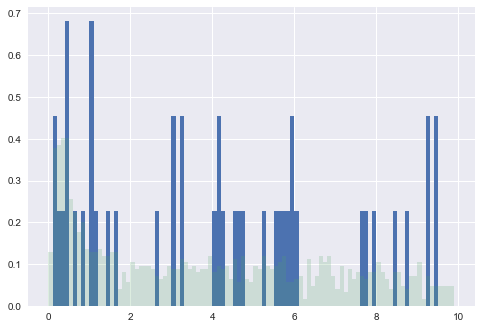

19.0979103639 16.0717172622


MannwhitneyuResult(statistic=114235.0, pvalue=0.015330538630003644)

In [113]:
Targeted = df[df["Targeted"]]
UnTargeted = df[~df["Targeted"]]
display(Targeted.head(2))
display(UnTargeted.head(2))
import scipy
#A = list(Targeted["bias"])
#B = list(UnTargeted["bias"])
A = list(Targeted["pre_mean"])
B = list(UnTargeted["pre_mean"])
bins = [x*0.1 for x in xrange(100)]
plt.hist(A, normed = 1, bins=bins)
plt.hist(B, normed = 1, bins = bins, alpha=0.2)
plt.show()
print np.mean(A), np.mean(B)
scipy.stats.mannwhitneyu(A, B, use_continuity=True, alternative="greater")

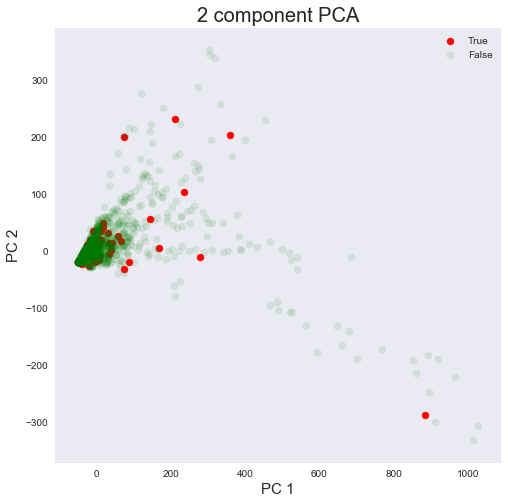

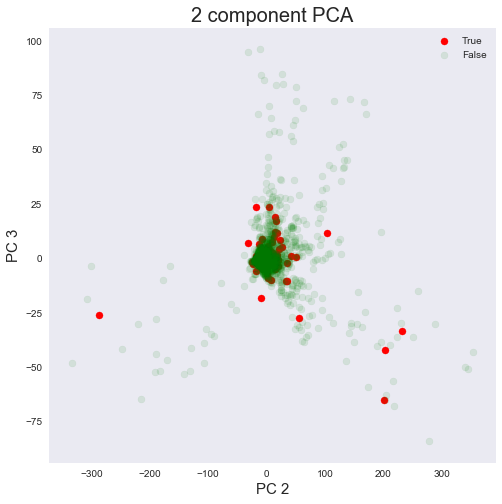

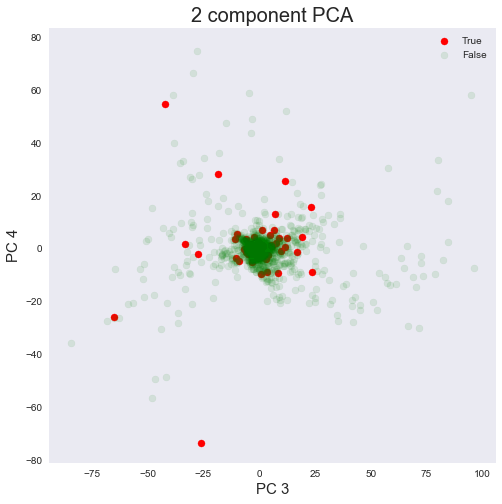

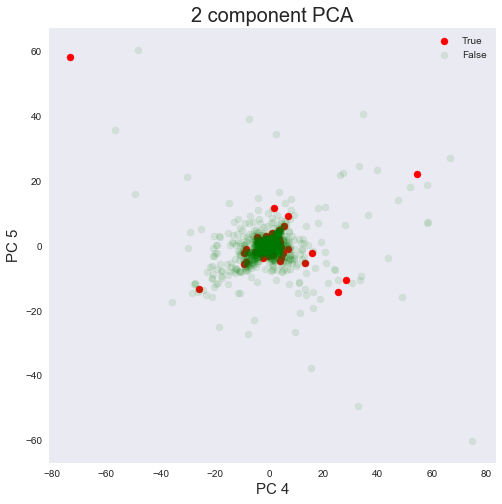

In [48]:
x = df.loc[:, columns[1:-1]].values
#print x[:3]
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
finalDf = pd.concat([principalDf, df[['Targeted']]], axis = 1)
for x,y in ([(1,2), (2,3), (3,4), (4,5)]):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('PC {}'.format(x), fontsize = 15)
    ax.set_ylabel('PC {}'.format(y), fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [True, False]
    colors = ['r', 'g']
    alphas = [1, 0.1]
    for target, color, alpha in zip(targets,colors, alphas):
        indicesToKeep = finalDf['Targeted'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'pc{}'.format(x)]
                   , finalDf.loc[indicesToKeep, 'pc{}'.format(y)]
                   , c = color
                   , alpha = alpha
                   , s = 50)
    ax.legend(targets)
    ax.grid()


plt.show()


In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
print x

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5